## Baltimore 

Baltimore (/ˈbɔːltɪmɔːr/ BAWL-tim-or, locally: /ˈbɔːlmər/ BAWL-mər) is the most populous city in the U.S. state of Maryland, as well as the 30th most populous city in the United States, with a population of 585,708 in 2020.Baltimore was designated an independent city by the Constitution of Maryland in 1851, and today is the largest independent city in the United States. As of 2017, the population of the Baltimore metropolitan area was estimated to be just under 2.802 million, making it the 21st largest metropolitan area in the country. Baltimore is located about 40 miles (64 km) northeast of Washington, D.C.,making it a principal city in the Washington–Baltimore combined statistical area (CSA), the third-largest CSA in the nation, with a calculated 2018 population of 9,797,063. For more about the city link here [Wiki Page](https://en.wikipedia.org/wiki/Baltimore)

Open Data provided by most of the cities in US gives you a lot of data to understand them, explore and get a idea of how the cities are managed and maintained by the authorities. Keeping the cities up and running, maintain law and order and protecting the interests of the people is a daunting tasks. Thanks to all those people who put in so much of efforts to help us stay in the comfort of our homes safe and sound.

This notebook will give you a glimpse into the 911 calls in the city of Baltimore in 2020.

In [1]:
## importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Loading the datasets
call911 = pd.read_csv("911_Calls_For_Service_2020.csv")

In [3]:
call911.head()

,objectid,recordid,callkey,calldatetime,priority,district,description,callnumber,incidentlocation,location,neighborhood,policedistrict,policepost,councildistrict,sheriffdistricts,community_statistical_areas,census_tracts,vrizones,zipcode
0,1,8285810,10CC9DA95F732422,2020/09/29 08:10:00+00,Low,ND,HIT AND RUN,P202730971,1200 W NORTHERN PY,1200 W NORTHERN PY BALTIMORE MD,Sabina-Mattfeldt,Northern,533.0,5.0,D2,Mount Washington/Coldspring,Census Tract 2715.01,NaN,21209.0
1,2,8286114,10CC9DA95F7333B2,2020/09/29 09:16:00+00,Low,SD,LARCENY,P202731136,900 WASHINGTON BL,900 WASHINGTON BL BALTIMORE MD,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2101,NaN,21230.0
2,3,8286082,10CC9DA95F733855,2020/09/29 09:36:00+00,Low,NE,AUTO THEFT,P202731188,4200 BLK FENWICK AV,4200 BLK FENWICK AV BALTIMORE MD,Hillen,Northeastern,412.0,3.0,D4,Northwood,Census Tract 2709.03,NaN,21218.0
3,4,8290068,10CC9DA95F748561,2020/09/30 09:17:00+00,Low,SE,OTHER,P202741169,1100 S CONKLING ST,1100 S CONKLING ST BALTIMORE MD,Canton,Southeastern,232.0,1.0,D6,Highlandtown,Census Tract 2609,NaN,21224.0
4,5,8290067,10CC9DA95F748784,2020/09/30 09:26:00+00,Low,WD,OTHER,P202741196,2400 WINCHESTER ST,2400 WINCHESTER ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,NaN,21216.0


In [4]:
call911.dropna(subset=['zipcode'], inplace=True)
call911.astype({'zipcode' : 'int32'}).head()

,objectid,recordid,callkey,calldatetime,priority,district,description,callnumber,incidentlocation,location,neighborhood,policedistrict,policepost,councildistrict,sheriffdistricts,community_statistical_areas,census_tracts,vrizones,zipcode
0,1,8285810,10CC9DA95F732422,2020/09/29 08:10:00+00,Low,ND,HIT AND RUN,P202730971,1200 W NORTHERN PY,1200 W NORTHERN PY BALTIMORE MD,Sabina-Mattfeldt,Northern,533.0,5.0,D2,Mount Washington/Coldspring,Census Tract 2715.01,NaN,21209
1,2,8286114,10CC9DA95F7333B2,2020/09/29 09:16:00+00,Low,SD,LARCENY,P202731136,900 WASHINGTON BL,900 WASHINGTON BL BALTIMORE MD,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2101,NaN,21230
2,3,8286082,10CC9DA95F733855,2020/09/29 09:36:00+00,Low,NE,AUTO THEFT,P202731188,4200 BLK FENWICK AV,4200 BLK FENWICK AV BALTIMORE MD,Hillen,Northeastern,412.0,3.0,D4,Northwood,Census Tract 2709.03,NaN,21218
3,4,8290068,10CC9DA95F748561,2020/09/30 09:17:00+00,Low,SE,OTHER,P202741169,1100 S CONKLING ST,1100 S CONKLING ST BALTIMORE MD,Canton,Southeastern,232.0,1.0,D6,Highlandtown,Census Tract 2609,NaN,21224
4,5,8290067,10CC9DA95F748784,2020/09/30 09:26:00+00,Low,WD,OTHER,P202741196,2400 WINCHESTER ST,2400 WINCHESTER ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,NaN,21216


I always thought majority of the calls to 911 would be emergency kind as the intention of the serivce itself is for emergency and since it is around for some times people must be aware of the kind of services available throught 911.

Understanding the distribution of the calls based on priority allows the city authorities to plan for the resources required.

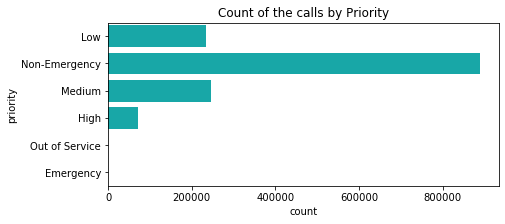

In [5]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="priority", data=call911, color="c")
plt.title('Count of the calls by Priority')
plt.show()

In [6]:
round(call911.priority.value_counts(normalize=True) * 100, 2)

Non-Emergency     61.67
Medium            17.10
Low               16.16
High               5.04
Emergency          0.02
Out of Service     0.01
Name: priority, dtype: float64

> Emergency calls are just 2% of the total calls in 2020 and that is totally surprising. 

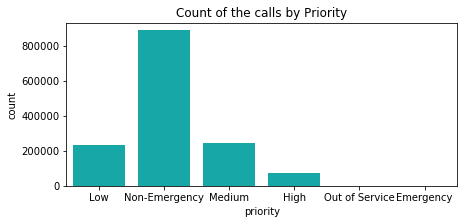

In [7]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(x="priority", data=call911, color="c")
plt.title('Count of the calls by Priority')
plt.show()

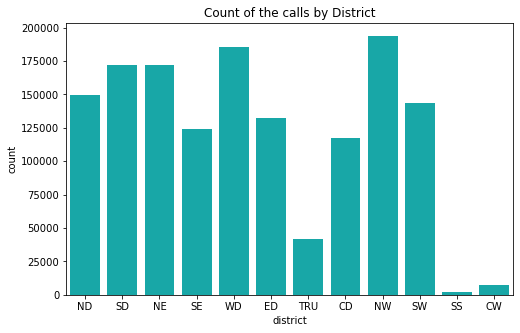

In [8]:
f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="district", data=call911, color="c")
plt.title('Count of the calls by District')
plt.show()

Majority of the districts have good distribution of the calls except for the three which are very low. It would be interesting to marry this data with the population of the district to understand if the population has any impact on the numbers, most probably it should be the reason.

### Type of Calls 

Based on the below table it is clear that 35% of the calls are for business checks. It is not very clear from the dataset what does it really mean but I am assuming people are calling to check if the business is open which is not really the kind of calls 911 teams should be handling.

In [88]:
(call911.description.value_counts(normalize=True) * 100).head()

Business Check    34.842947
Foot  Patrol       6.254094
DISORDERLY         6.123517
911/NO  VOICE      5.208437
Traffic Stop       4.896218
Name: description, dtype: float64

In [82]:
top10calls = call911.description.value_counts()[:10].to_frame().reset_index()

In [24]:
top10calls.columns = ['Description', 'CountofCalls']

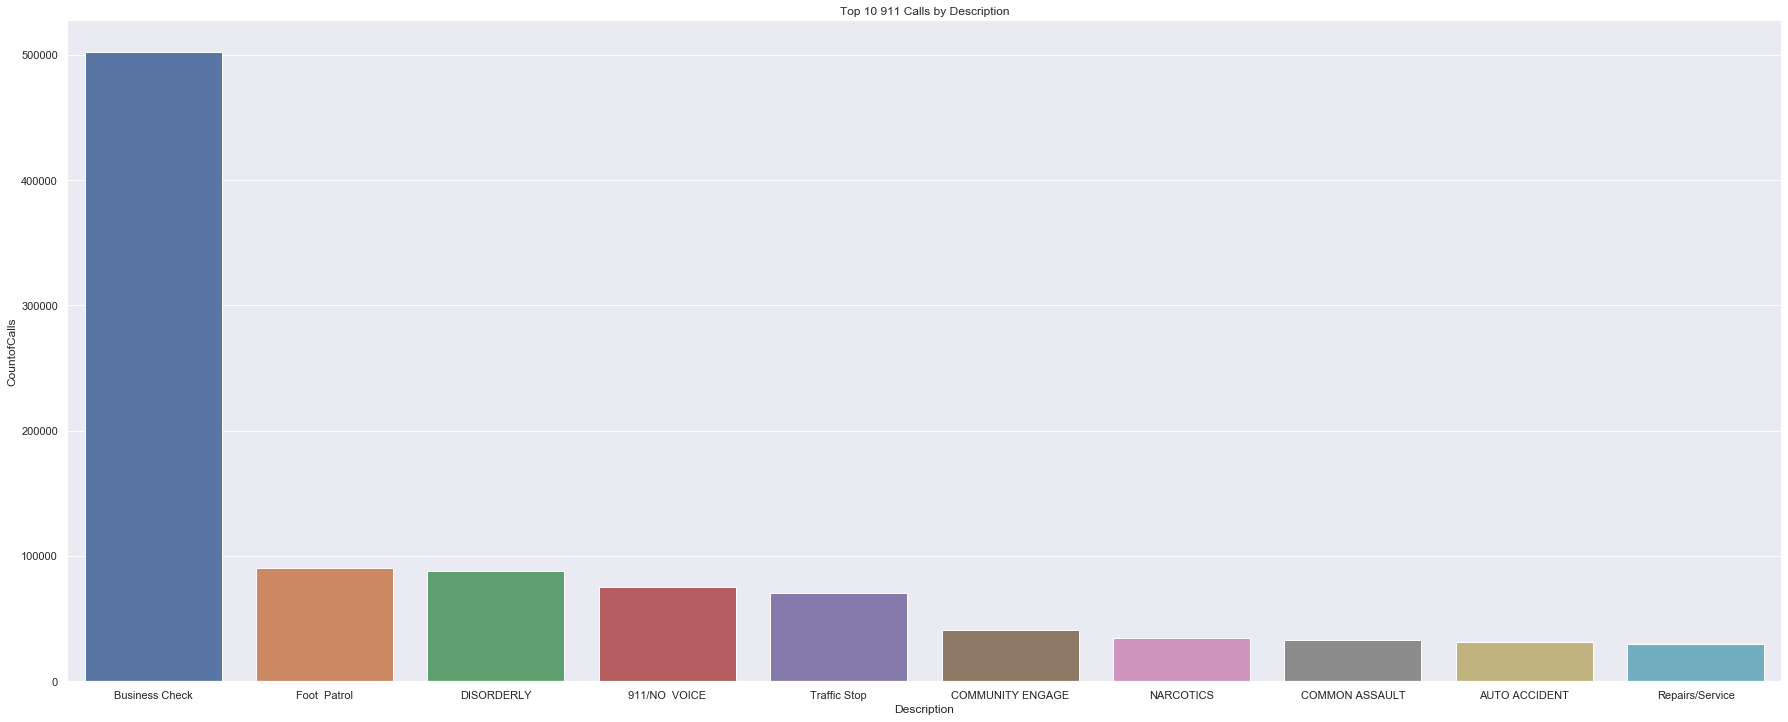

In [43]:
sns.catplot(data=top10calls, x='Description', y='CountofCalls', kind='bar', height=10, aspect=20/8)
plt.title("Top 10 911 Calls by Description")
plt.show()

### Business checks 

How are these business check calls distributed

In [48]:
businesschecks = call911.query("description == 'Business Check'")
businesschecks.head()

,objectid,recordid,callkey,calldatetime,priority,district,description,callnumber,incidentlocation,location,neighborhood,policedistrict,policepost,councildistrict,sheriffdistricts,community_statistical_areas,census_tracts,vrizones,zipcode
799,800,8438597,1201020A5FA15B54,2020/11/03 08:29:00+00,Non-Emergency,NW,Business Check,P203081422,3900 LIBERTY HEIGHTS AV,3900 LIBERTY HEIGHTS AV BALTIMORE MD,Central Forest Park,Northwestern,621.0,6.0,D1,Dorchester/Ashburton,Census Tract 1510,NaN,21207.0
803,804,8438659,1201020A5FA15C01,2020/11/03 08:32:00+00,Non-Emergency,ND,Business Check,P203081429,1300 W 36TH ST,1300 W 36TH ST BALTIMORE MD,Hampden,Northern,531.0,7.0,D2,Medfield/Hampden/Woodberry/Remington,Census Tract 1308.04,NaN,21211.0
804,805,8438613,1201020A5FA15C05,2020/11/03 08:32:00+00,Non-Emergency,CD,Business Check,P203081430,200 MCMECHEN ST,200 MCMECHEN ST BALTIMORE MD,Bolton Hill,Central,132.0,11.0,D8,Midtown,Census Tract 1401,NaN,21217.0
805,806,8438564,1201020A5FA15C0D,2020/11/03 08:33:00+00,Non-Emergency,NE,Business Check,P203081431,3400 BELAIR RD,3400 BELAIR RD BALTIMORE MD,Belair-Edison,Northeastern,432.0,13.0,D5,Belair-Edison,Census Tract 801.01,Northeastern,21213.0
808,809,8438645,1201020A5FA15CBA,2020/11/03 08:35:00+00,Non-Emergency,SW,Business Check,P203081436,2200 WILKENS AV,2200 WILKENS AV BALTIMORE MD,Carrollton Ridge,Southwestern,841.0,9.0,D8,Southwest Baltimore,Census Tract 2005,Tri-District,21223.0


#### Just 1 call is of high priority rest all are non emergency calls.

In [50]:
businesschecks.priority.value_counts()

Non-Emergency    502188
High                  1
Name: priority, dtype: int64

#### Business calls by District , Police District, Neighborhood and Locations

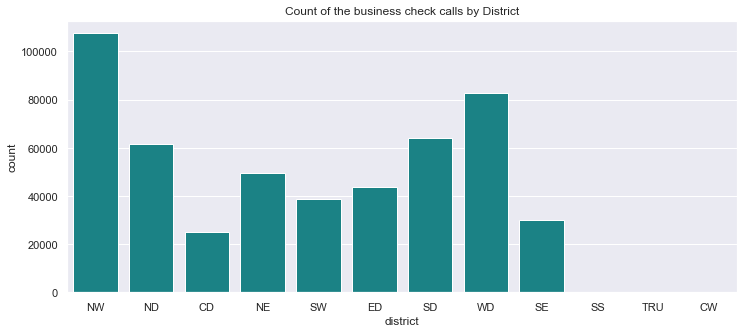

In [65]:
f, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x="district", data=businesschecks, color="#0a9396")
plt.title('Count of the business check calls by District')
plt.show()

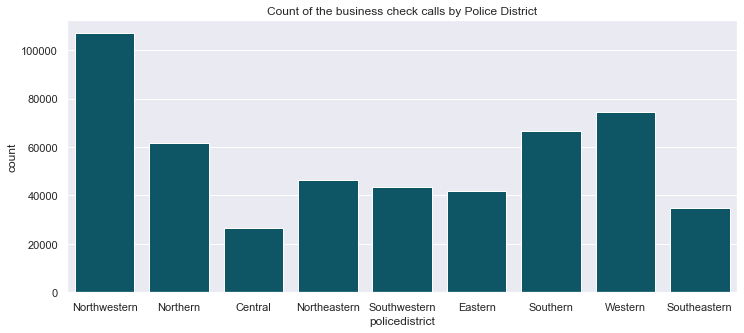

In [68]:
f, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x="policedistrict", data=businesschecks, color="#005f73")
plt.title('Count of the business check calls by Police District')
plt.show()

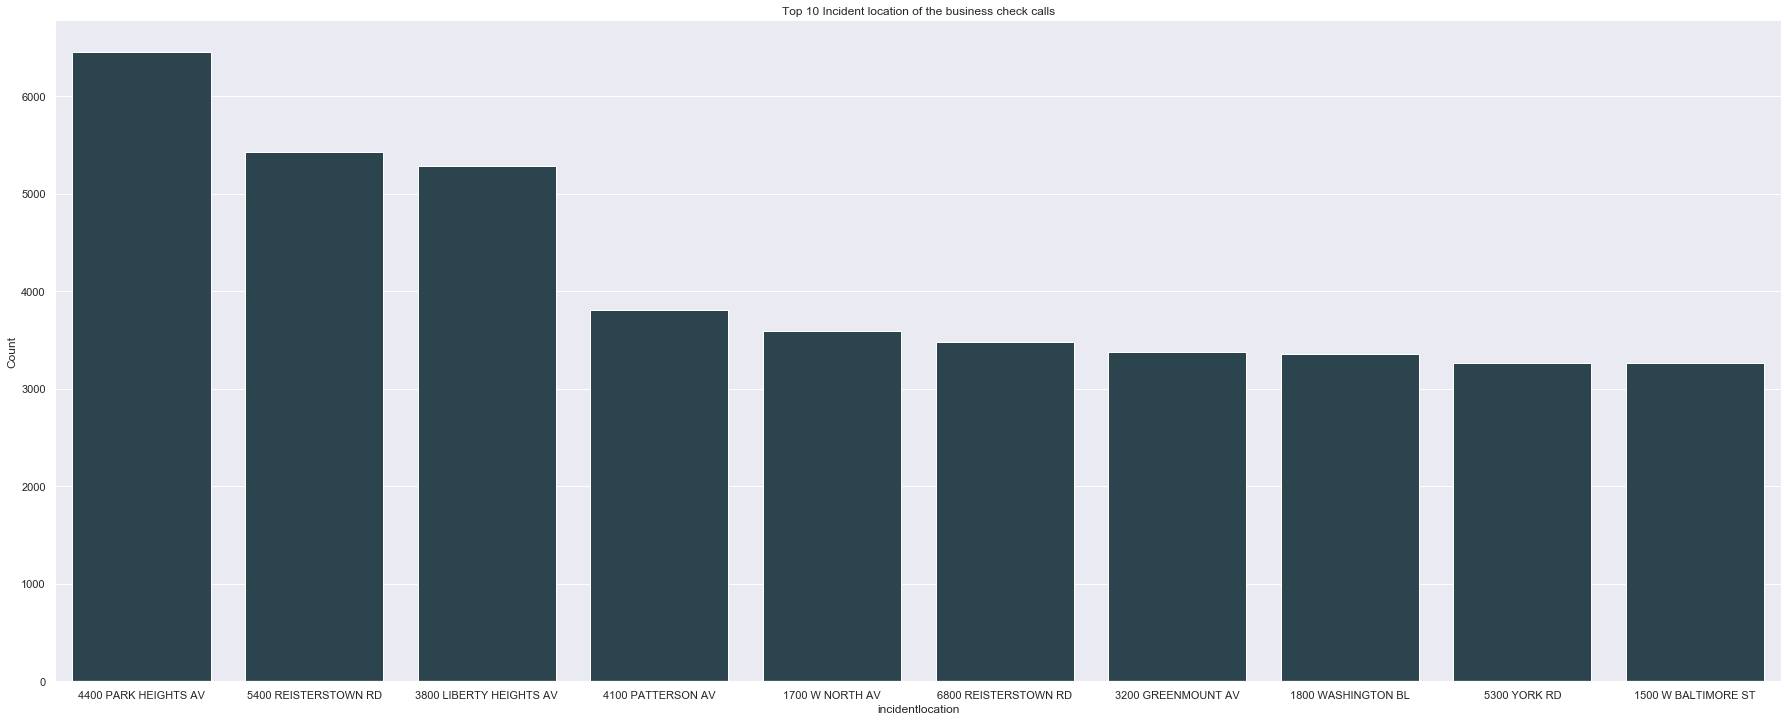

In [100]:
top10incidentlocation = businesschecks.incidentlocation.value_counts()[:10].reset_index()
top10incidentlocation.columns = ['incidentlocation', 'Count']
sns.catplot(x="incidentlocation", y='Count', data=top10incidentlocation, color="#264653", kind='bar', height=10, aspect=20/8)
plt.title('Top 10 Incident location of the business check calls')
plt.show()

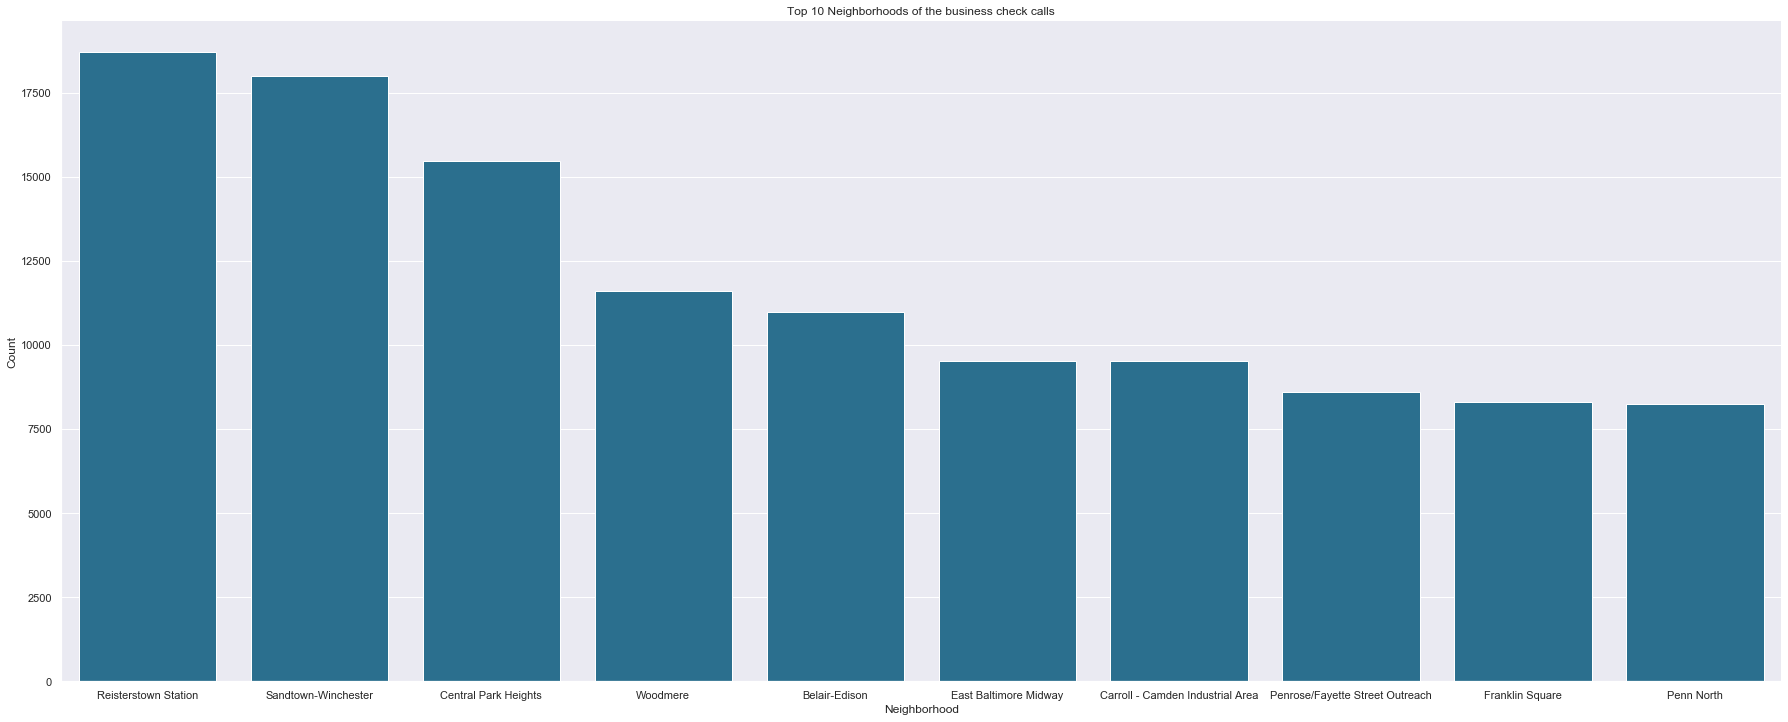

In [101]:
top10bneighbors = businesschecks.neighborhood.value_counts()[:10].reset_index()
top10bneighbors.columns = ['Neighborhood', 'Count']
sns.catplot(x="Neighborhood", y='Count', data=top10bneighbors, color="#1a759f", kind='bar', height=10, aspect=20/8)
plt.title('Top 10 Neighborhoods of the business check calls')
plt.show()

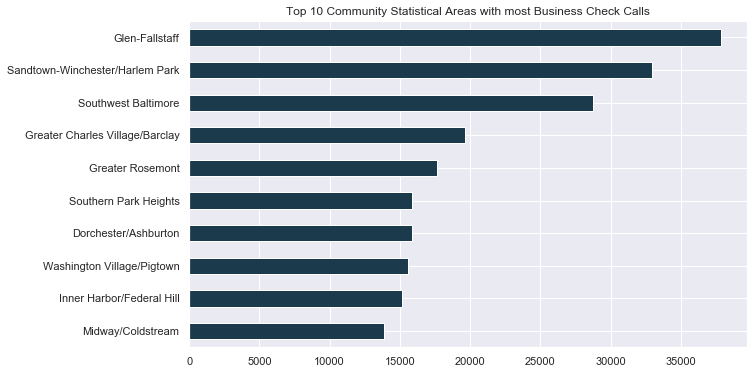

In [118]:
f, ax = plt.subplots(figsize=(10, 6))
businesschecks.community_statistical_areas.value_counts()[:10].sort_values().plot(kind='barh', color='#1b3a4b')
plt.title('Top 10 Community Statistical Areas with most Business Check Calls')
plt.show()

### How the calls vary based on the date and time attributes 


Knowing how the calls are distributed across the time frames helps in planning the availability of the resources to provide the services at the right time.

In [224]:
##Converting the datetime column type
call911['calldatetime'] = pd.to_datetime(call911['calldatetime']) 

## Creating new columns from datetime
call911['Date'] = call911.calldatetime.dt.date
call911['Year'] = call911.calldatetime.dt.year
call911['Month'] = call911.calldatetime.dt.month_name()
call911['Day'] = call911.calldatetime.dt.day
call911['Weekday'] = call911.calldatetime.dt.day_name()
call911['Hour'] = call911.calldatetime.dt.hour
daytime = call911[['calldatetime','Date' ,'Year', 'Month', 'Day', 'Weekday', 'Hour']]

daytime.head()

,calldatetime,Date,Year,Month,Day,Weekday,Hour
0,2020-09-29 08:10:00+00:00,2020-09-29,2020,September,29,Tuesday,8
1,2020-09-29 09:16:00+00:00,2020-09-29,2020,September,29,Tuesday,9
2,2020-09-29 09:36:00+00:00,2020-09-29,2020,September,29,Tuesday,9
3,2020-09-30 09:17:00+00:00,2020-09-30,2020,September,30,Wednesday,9
4,2020-09-30 09:26:00+00:00,2020-09-30,2020,September,30,Wednesday,9


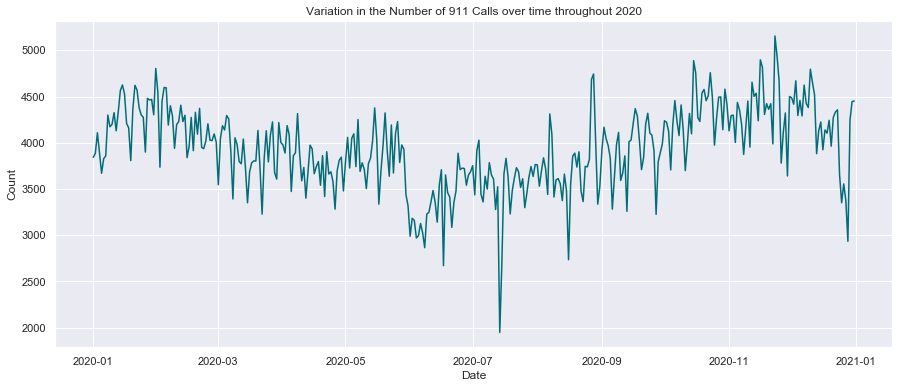

In [165]:
datetimes = daytime.Date.value_counts().reset_index()
datetimes.columns = ['Date', 'Count']

f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=datetimes, x = 'Date', y = 'Count', color = '#006d77')
plt.title('Variation in the Number of 911 Calls over time throughout 2020')
plt.show()

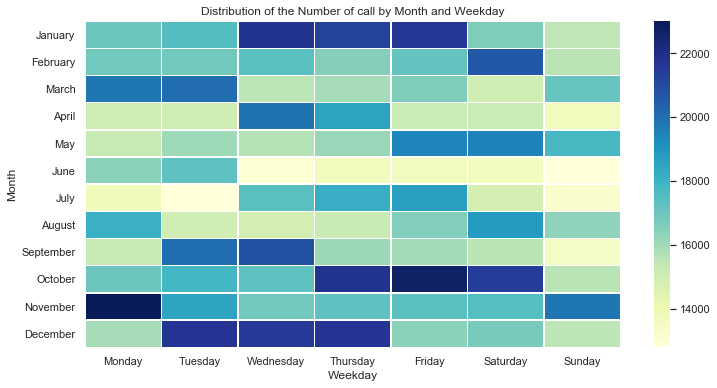

In [247]:

## Getting the counts by Weekday and Month
counts = daytime.groupby(['Month', 'Weekday']).count().reset_index()

## Categorizing and ordering the month and weekdays
counts['Weekday'] = pd.Categorical(counts['Weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

counts['Month'] = pd.Categorical(counts['Month'], categories=
    ['January','February','March','April','May','June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True)

### Creating the pivot table for creating the heatmap
tt = counts.pivot('Month', 'Weekday', 'Day')
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(tt, cmap="YlGnBu", linewidths=.5)
plt.title("Distribution of the Number of call by Month and Weekday")
plt.show()


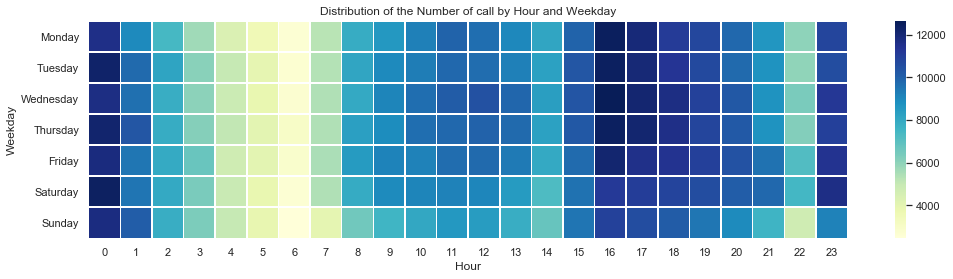

In [241]:
## Getting the counts by Weekday and Hour
counts = daytime.groupby(['Weekday', 'Hour']).count().reset_index()

## Categorizing and ordering the weekdays
counts['Weekday'] = pd.Categorical(counts['Weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

### Creating the pivot table for creating the heatmap
tt = counts.pivot('Weekday', 'Hour', 'Day')
f, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(tt, cmap="YlGnBu", linewidths=.5)
plt.title("Distribution of the Number of call by Hour and Weekday")
plt.show()

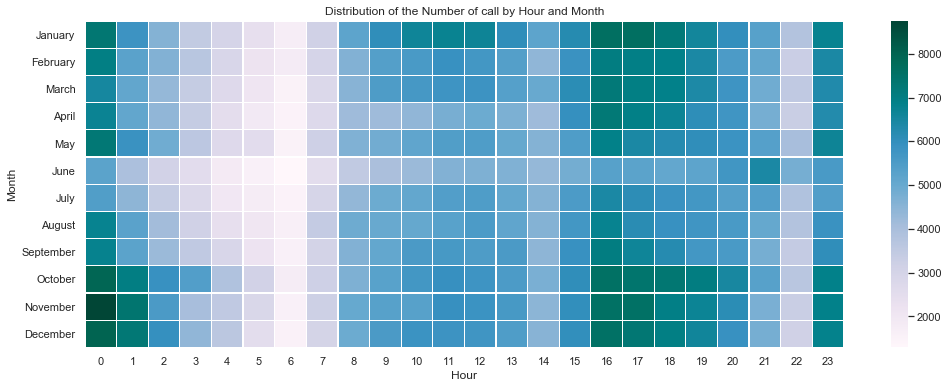

In [246]:
## Getting the counts by Weekday and Hour
counts = daytime.groupby(['Month', 'Hour']).count().reset_index()

## Categorizing and ordering the month
counts['Month'] = pd.Categorical(counts['Month'], categories=
    ['January','February','March','April','May','June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True)

### Creating the pivot table for creating the heatmap
tt = counts.pivot('Month', 'Hour', 'Day')
f, ax = plt.subplots(figsize=(17, 6))
sns.heatmap(tt, cmap="PuBuGn", linewidths=.2)
plt.title("Distribution of the Number of call by Hour and Month")
plt.show()

* Weekdays get more calls than weekends
* Midnights and late evenings get more busy
* Sunday is usually the better day
* Winter months are more busier than summer months

### What is National 911 Program?
The 911 system was designed to provide a universal, easy-to-remember number for people to reach police, fire or emergency medical assistance from any phone in any location, without having to look up specific phone numbers. Today, people communicate in ways that the designers of the original 911 system could not have envisioned: wireless phones, text and video messages, social media, Internet Protocol (IP)-enabled devices, and more. 

### What can you call 911 for?
An emergency is any serious medical problem (chest pain, seizure, bleeding), any type of fire (business, car, building), any life-threatening situation (fights, person with weapons, etc.) or to report crimes in progress.


### What you should not call 911 for?

Do not dial 911 for a non-emergency. Instead, dial the non-emergency telephone number (540) 662-6162. A non-emergency incident is a property damage accident, break-in to a vehicle when suspect is gone, theft of property (when suspect is gone), vandalism (when suspect is gone), panhandlers, intoxicated persons who are not disorderly or dogs barking or at large.


Looking at the 2020 911 Calls for Baltimore it is clear this service is not used by the community for the emergency services. I am sure people want to get some help quickly whenever they are in some problem but the whole point of the 911 service is for the people with real emergency get the service quickly. This should be educated more among the community and help them understand the challenges if we really do not use the service for the intented purpose. 

I have been in USA for more than 7 years now and I do not see any communication or community activities which helps the people of the community to understand the services available and how to avail those services. Like every company makes their employees to go through the basic trainings related to the company every year, every city or state or community should have yearly refresh of the trainings for services available in the city and how to avail them and who and when people should try to use them.

Keeping the city or county safe and sound requires more than few teams. It is the responsibility of the community and its people to make effort to keep the community informed.

In this case 2% of the calls were emergency and imagine teams having to deal with 98% of the non emergency calls when their actual purpose is to just serve 2%. Every one of us should make an effort to make sure that those with only emergency call for such services and not flood the 911 team with the calls which they are really not intented for.

#### Source:


* [Baltimore Open DataSets](https://data.baltimorecity.gov/datasets/911-calls-for-service-2020)
* [911.gov](https://www.911.gov/needtocallortext911.html)
* [Frederick County Notes on 911](https://www.fcva.us/departments/public-safety-communications/do-s-and-don-ts-of-911)